# k-means clustering

### Generate artificial clusters

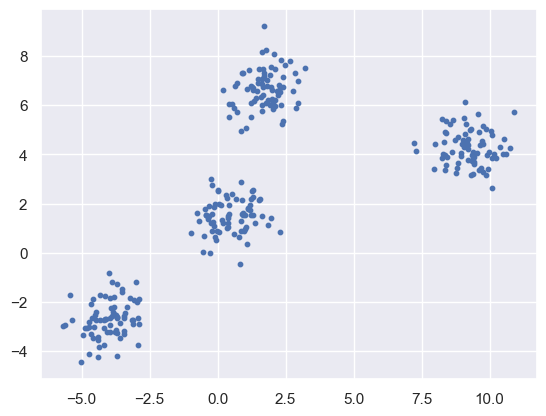

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.70) # random_state=0 for reproducibily 
plt.scatter(X[:, 0], X[:, 1], s=10);

### k-means implementation

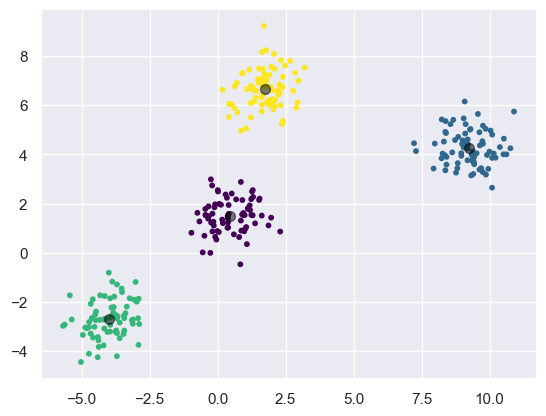

In [13]:
from sklearn.metrics import pairwise_distances_argmin
#pairwise_distances_argmin: Compute arg_minimum distances between one point and a set of points.
import random

def find_clusters(X, n_clusters, rseed=random.randint(0,1000)):
    # 1. Randomly choose clusters centers
    rng = np.random.RandomState(rseed)
    selected_index = rng.permutation(X.shape[0])[:n_clusters]
    #print(selected_index)
    centers = X[selected_index]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        #print(labels == 1)
        
        # 2b. Find new centers from means of points
        new_centers = np.array( [ X[labels == i].mean(0) for i in range(n_clusters) ] ) 
        #labels == i list of true and false
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

### k-means clustering using scikit-learn library

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='random', n_init=10)
kmeans.fit(X) #compute k-means clustering
y_kmeans = kmeans.predict(X) #predict the closest cluster for each instance in X

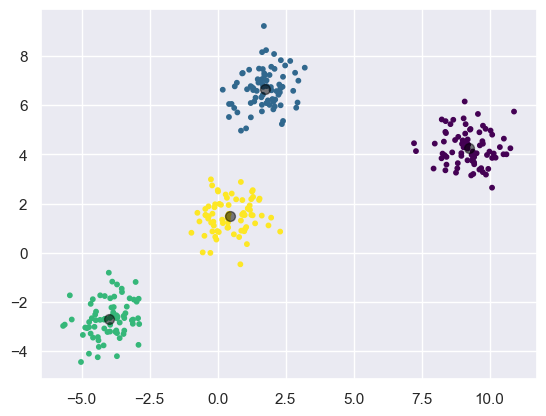

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);